## Inferential Statistics Report: Code##
***

In [2]:
# Importing All the Essential Tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [3]:
# Importing DataFrame for EDA
df = pd.read_csv('readmit_hhc_final.csv', index_col = 0)


In [4]:
#Loading Important EDA Programs
def ecdf(data):
    """takes numpy array data, sorts it and gives x and y values for plotting.
    Output is two values, x and y."""
    # Number of data points:
    n = len(data)
            
    # ECDF x data:
    x = np.sort(data)
    
    # ECDF y data:
    y = np.arange(1, n+1)/n
    
    return x,y

In [5]:
# From the original EDA Readmission Ratios did not appear to be normally distributed.
#  However, let's confirm if they are even close by computing the theoretical CDF
mean= np.mean(df.readmission_ratio)
std = np.std(df.readmission_ratio)
samples = np.random.normal(mean, std, size =10000) 
x, y =ecdf(df.readmission_ratio)
x_theor, y_theor = ecdf(samples)

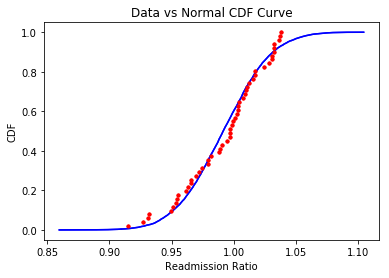

In [12]:
# Plot Readmission Ratios to Confirm Normality
_ = plt.plot(x_theor,y_theor, color='blue')
_ = plt.plot(x,y,marker='.', linestyle='none', color='red')
_ = plt.xlabel('Readmission Ratio')
_ = plt.ylabel('CDF')
_ = plt.title('Data vs Normal CDF Curve')
plt.show()

While not exact, the readmission ratio does appear to mostly follow the normal distribution.  I do not believe we will be making too big of an error by treating it as such.

***
Our inital EDA showed correlations between the following survey reports and the readmission ratio:<br><br>
fall risk, flu shot, pnemonia shot, heart failure treatment, improved movement, decreased movement pain, improved wound healing, improved oral rx, hospital admissions, urgent care admissions without hospitalization, and clients recommendation rating.<br><br>
Let's go over this data to see if any of these correlations are significant (alpha 0.01).

In [68]:
# Creating List to Iterate Through
x_list = ['fall_risk', 'flu_shot', 'pneumonia_shot', 'heart_f_treat', 'move_buff', 'move_pain_debuff',
          'healing_buff', 'oral_rx_buff', 'hospital_admit', 'urgent_noadmit','would_recommend']

# Iterating Through Dataframe Columns and Printing Correlation Coeffecient and P Value
for x in range(len(x_list)):
    r,p = stats.pearsonr(df[x_list[x]], df.readmission_ratio)
    print(x_list[x].ljust(16),':','Pearson r: ', str(round(r,2)).ljust(5),' P Value: ',round(p,4))

fall_risk        : Pearson r:  -0.17  P Value:  0.2276
flu_shot         : Pearson r:  -0.53  P Value:  0.0001
pneumonia_shot   : Pearson r:  -0.73  P Value:  0.0
heart_f_treat    : Pearson r:  -0.15  P Value:  0.2997
move_buff        : Pearson r:  0.37   P Value:  0.0078
move_pain_debuff : Pearson r:  0.42   P Value:  0.0021
healing_buff     : Pearson r:  0.41   P Value:  0.0031
oral_rx_buff     : Pearson r:  0.46   P Value:  0.0008
hospital_admit   : Pearson r:  0.39   P Value:  0.0042
urgent_noadmit   : Pearson r:  -0.43  P Value:  0.0018
would_recommend  : Pearson r:  -0.21  P Value:  0.1422


From this review we now know that the following survey ratings have a statistically significant correlation to readmission ratios:
-   Flu Shot Rating (- Correlation)
-   Pneumonia Shot Rating (- Correlation)
-   Improved Movement (+ Correlation)
-   Decreased Movement Pain (+ Correlation)
-   Improved Wound Healing (+ Correlation)
-   Oral Rx Improvement (+ Correlation)
-   Hospital Admissions (+ Correlation)
-   Urgent Care Without Inpaitent Admissions (- Correlation)
